In [1]:
#!wget https://sagemaker-lsa-texts.s3.amazonaws.com/goldilocks.txt

In [2]:
#!wget https://sagemaker-lsa-texts.s3.amazonaws.com/littleredridinghood.txt

In [3]:
red = open("littleredridinghood.txt").read().splitlines()
gold = open("goldilocks.txt").read().splitlines()

In [4]:
# create body data frame
import pandas as pd

red_df = pd.DataFrame({"title": "LittleRedRidingHood", "sentence": red})
gold_df = pd.DataFrame({"title": "Goldilocks", "sentence": gold})

body_df = pd.concat([red_df, gold_df], ignore_index=True)

In [5]:
# create document-term matrix
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(min_df=1, stop_words="english")
bag_of_words = vectoriser.fit_transform(body_df.sentence)

In [6]:
# perform singular value decomposition
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
lsa = svd.fit_transform(bag_of_words)

In [7]:
# topic encoded data
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2"])
topic_encoded_df["sentence"] = body_df.sentence
topic_encoded_df["isRedRidingHood"] = (body_df.title == "LittleRedRidingHood")

# dictionary
dictionary = vectoriser.get_feature_names()

# encoding matrix
encoding_matrix = pd.DataFrame(svd.components_, index=["topic_1", "topic_2"]).T
encoding_matrix["terms"] = dictionary

In [8]:
# interpret encoding matrix
import numpy as np

encoding_matrix["abs_topic_1"] = np.abs(encoding_matrix["topic_1"])
encoding_matrix["abs_topic_2"] = np.abs(encoding_matrix["topic_2"])

print(encoding_matrix.sort_values("abs_topic_1", ascending=False))
print(encoding_matrix.sort_values("abs_topic_2", ascending=False))

      topic_1   topic_2        terms  abs_topic_1  abs_topic_2
139  0.387834 -0.127140         hood     0.387834     0.127140
230  0.387834 -0.127140       riding     0.387834     0.127140
222  0.387834 -0.127140          red     0.387834     0.127140
164  0.337502 -0.118031       little     0.337502     0.118031
122  0.261320  0.018160  grandmother     0.261320     0.018160
..        ...       ...          ...          ...          ...
152  0.002321  0.023776      kitchen     0.002321     0.023776
226  0.001785 -0.001955        reply     0.001785     0.001955
11   0.000686  0.003662        apron     0.000686     0.003662
142  0.000447 -0.002126          hug     0.000447     0.002126
74   0.000003 -0.000158    delighted     0.000003     0.000158

[340 rows x 5 columns]
      topic_1   topic_2      terms  abs_topic_1  abs_topic_2
209  0.059090  0.403608   porridge     0.059090     0.403608
18   0.069769  0.399201       bear     0.069769     0.399201
51   0.045373  0.278152      chair   

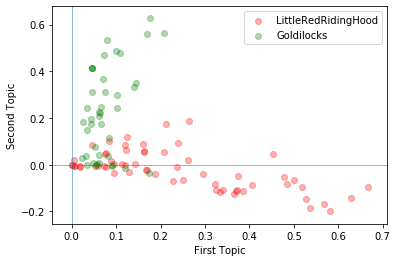

In [9]:
# plot topic encoded data
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for val in topic_encoded_df.isRedRidingHood.unique():
    topic_1 = topic_encoded_df[topic_encoded_df.isRedRidingHood == val]["topic_1"].values
    topic_2 = topic_encoded_df[topic_encoded_df.isRedRidingHood == val]["topic_2"].values
    colour = "red" if val else "green"
    label = "LittleRedRidingHood" if val else "Goldilocks"
    ax.scatter(topic_1, topic_2, c=colour, alpha=0.3, label=label)

ax.set_xlabel("First Topic")
ax.set_ylabel("Second Topic")
ax.axvline(linewidth=0.5)
ax.axhline(linewidth=0.5)
ax.legend()

fig.show()